In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks')
from UZ_utils import *

sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks/assignment4')
from a4_utils import *

sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks/assignment5')
from a5_utils import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EX 1a

d = x1 - x2
_____________________

x1 / f = px / pz => x1 = px * f / pz

-x2 / f = (T - px) / pz => x2 = (px - T) * f / pz

__________________________

d = px * f / pz - (px - T) * f / pz

d = (px - (px - T)) * f / pz

d = T * f / pz

____________________

d in pz sta obratno sorazmerna: dlje ko je predmet od kamere, manjši je d


EX 1b

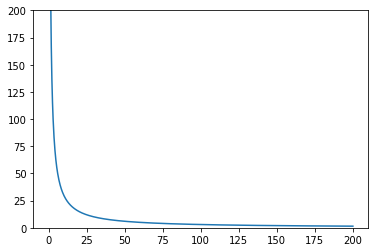

In [4]:
f = 2.5 #mm
T = 120 #mm #12 cm
pz = np.linspace(0.0001, 200, num=1000)
d = T * f / pz
plt.ylim([0, 200])
plt.plot(pz,d)




EX 1c

f = 2.5 mm

T = 120 mm

sensor_resolution = 648 x 488

pixel_width = 0.0074 mm

px_xL = 550  # 550. pixel

px_xR = 300  (540)
________________________
xL = px_xL * pixel_width = 4.07

xR = px_xR * pixel_width = 2.22

d = xL - xR = 1.85

pz = T * f / d = 162.162 mm = 0.16 m
_______________________

xR = px_xR * pixel_width = 3.996

d = xL - xR = 0.074

pz = T * f / d = 4054 mm = 4.05 m




EX 1d* DELA

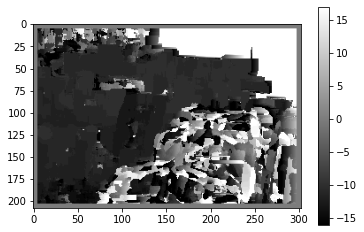

In [ ]:
def resize_gray(stri,r=2):
  img = cv2.imread(stri)
  res = cv2.resize(img, dsize=(int(img.shape[1]/r),int(img.shape[0]/r)), interpolation=cv2.INTER_CUBIC)
  gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
  return(gray)

def NCC(X,Y):
  X = X.reshape(-1)
  Y = Y.reshape(-1)
  x_ = X.mean()
  y_ = Y.mean()
  x_diff = (X-x_)
  y_diff = (Y-y_)
  st = np.sum(x_diff*y_diff)
  im = np.sqrt( np.sum(x_diff*x_diff) * np.sum(y_diff*y_diff) )
  return (st,im)

def neki(IL,IR):
  I = np.zeros(IL.shape)
  k = 5 #patchsize 10
  w = 17 #window 34
  for row in range(k,IL.shape[0]-k):
    for cL in range(k,IL.shape[1]-k):
      d = 0
      NCCmax = None
      X = IL[row-k:row+k,cL-k:cL+k]
      l1 = max(k,cL-w)
      l2 = min(cL+w,IR.shape[1]-k)
      for cR in range(l1,l2):
        Y = IR[row-k:row+k,cR-k:cR+k]
        #print(X.shape,Y.shape)
        NCCcurr = NCC(X,Y)
        if NCCcurr[1] < 0.0000000000001:
          d = cL-cR
          break
        if NCCmax is None or NCCcurr[0]/NCCcurr[1] > NCCmax:
          NCCmax = NCCcurr[0]/NCCcurr[1]
          d = cL-cR
      I[row,cL] = d
    #imshow(I)
  return(I)

IL = resize_gray("/content/drive/MyDrive/ColabNotebooks/assignment5/data/disparity/office_left.png")
IR = resize_gray("/content/drive/MyDrive/ColabNotebooks/assignment5/data/disparity/office_right.png")
I = neki(IL,IR)
imshow(I)

EX 1e* TO NE DELA, NIMAM IDEJE

In [ ]:
# I1 = neki(IL,IR)
# I2 = neki(IR,IL)

In [32]:
# def vote(I,I_,k):
#   for r in range(I_.shape[0]):
#     for c in range(I_.shape[1]):
#       ind = int(c+k*I_[r,c])
#       #print(ind)
#       if 0 <= ind and ind < I.shape[1]:
#         I[r,ind]+=1
#   return(I)
# imshow(I1)
# imshow(I2)
# I = np.zeros(I1.shape)
# I = vote(I,I1,1)
# I = vote(I,I2,-1)
# imshow(I)

EX 2a

```
F = 1  0   0
    0  0.5 0
    0  0  -1

c = 0; r = 2
x = (0,2,1)
Fx = l'
l' = (0,2,-1)
[c',r',1] l' = 0
line in right im:
  2 * r' - 1 = 0
  r' = 1/2

c = 1; r = 0
x = (1,0,1)
Fx = l'
l' = (1,0,-1)
[c',r',1] l' = 0
line in right im:
  c' - 1 = 0
  c' = 1


```


  

EX 2b

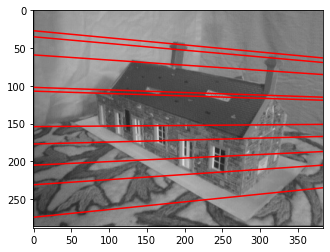

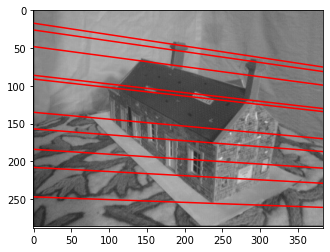

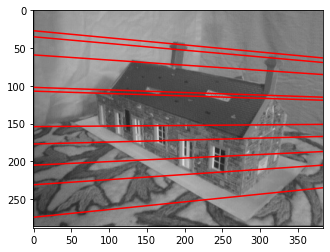

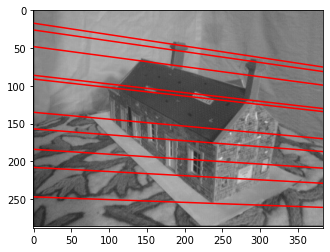

[[-8.85211824e-07 -5.61591880e-06  1.94310952e-03]
 [ 9.39281870e-06  6.16883199e-07 -1.20066302e-02]
 [-1.20308414e-03  1.10370070e-02 -8.53173359e-02]]
[[-8.85211824e-07 -5.61591880e-06  1.94310952e-03]
 [ 9.39281870e-06  6.16883199e-07 -1.20066302e-02]
 [-1.20308414e-03  1.10370070e-02 -8.53173359e-02]]
[[-4.93029503e-16  6.82962665e-18  7.58941521e-18]
 [-2.42469957e-16 -1.70817958e-17  2.56739074e-16]
 [ 3.69929781e-16 -1.16226473e-16 -1.47104551e-15]]


In [5]:
def fundamental_matrix(U,V,U_,V_):
  A = np.column_stack([U*U_, U_*V, U_,U*V_, V*V_, V_, U, V, np.ones(U.shape)])
  _, _, vT = np.linalg.svd(A)
  f = vT[-1,:]
  #f = f / vT[-1,-1]
  F = f.reshape((3,3))
  Uf,df,Vf = np.linalg.svd(F)
  
  df[-1] = 0
  Df = np.diag(df)
  F_ = np.matmul(Uf,np.matmul(Df,Vf))
  return(F_)

def fundamental_matrix_ext(UV,U_V_):
  nps,T1 = normalize_points(UV)
  U = nps[:,0]
  V = nps[:,1]
  nps,T2 = normalize_points(U_V_)
  U_ = nps[:,0]
  V_ = nps[:,1]
  F_ = fundamental_matrix(U,V,U_,V_)
  F = T2.T.dot(F_).dot(T1)
  #F = np.matmul(T2.T,np.matmul(F_,T1))
  return(F)

def epi(IL,IR,F,UV,U_V_):
  plt.imshow(IL)
  for i in range(U_V_.shape[0]):
    x = np.array([U_V_[i,0],U_V_[i,1],1])
    l  = F.T.dot(x)
    draw_epiline(l,IL.shape[0],IL.shape[1])
  plt.show()

  plt.imshow(IR)
  for i in range(UV.shape[0]):
    x = np.array([UV[i,0],UV[i,1],1])
    l_ = F.dot(x)
    draw_epiline(l_,IR.shape[0],IR.shape[1])
  plt.show()
  



  

INP = np.loadtxt("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house_points.txt")
myF = fundamental_matrix_ext(INP[:,0:2],INP[:,2:4])
F = np.loadtxt("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house_fundamental.txt")
IL = plt.imread("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house1.jpg")
IR = plt.imread("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house2.jpg")
epi(IL,IR,F,INP[:,0:2],INP[:,2:4])
epi(IL,IR,myF,INP[:,0:2],INP[:,2:4])

print(F)
print(myF)
print(F-myF)


EX 2c

In [6]:
def distance(l,x):
  return np.abs(l[0]*x[0]+l[1]*x[1]+l[2])/np.sqrt(l[0]**2+l[1]**2)

def reprojection_error(F,c,r,c_,r_):
  x_ = np.array([c_,r_,1])
  l  = F.T.dot(x_)
  x = np.array([c,r,1])
  l_  = F.dot(x)
  return (distance(l,x) + distance(l_,x_))/2

F = np.loadtxt("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house_fundamental.txt")
print(reprojection_error(F,85,233,67,219))
INP = np.loadtxt("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house_points.txt")
print(np.mean([reprojection_error(F,INP[i,0],INP[i,1],INP[i,2],INP[i,3]) for i in range(INP.shape[0]) ] ) ) 




0.14674365643746756
0.3309133712713169


EX 2d* DELA

In [12]:
def gaussian(o=2):
  N = int(np.ceil(3*o))
  k = np.zeros(2*N+1)
  inter = np.arange(-N,N+1)
  return 1/(np.sqrt(2*np.pi)*o) * np.exp(-1*(np.square(inter)/(2*o*o)))

def gaussdx(o=2):
  N = int(np.ceil(3*o))
  k = np.zeros(2*N+1)
  inter = np.arange(-N,N+1)
  not_normal = -1/(np.sqrt(2*np.pi)*o*o*o)*inter * np.exp(-1*(np.square(inter)/(2*o*o)))
  #not_normal = -1* not_normal # flip kernel as it is not symmetric
  return not_normal/np.sum(np.abs(not_normal))

def filter(I, kernel2D):
  I_k = cv2.filter2D(src=I, ddepth=-1, kernel = kernel2D)
  return I_k

def get_G_D(o):
  G = -1*gaussian(o)
  G = G.reshape(1,len(G))
  D = gaussdx(o)
  D = D.reshape(1,len(D))
  return (G,D)

def part_deriv_x(I,o):
  G,D = get_G_D(o)
  return filter(filter(I, G.T),D) # x

def part_deriv_y(I,o):
  G,D = get_G_D(o)
  return filter(filter(I, G),D.T) # y

def part_deriv_x_x(I,o):
  G,D = get_G_D(o)
  return part_deriv_x(part_deriv_x(I,o),o) # x x

def part_deriv_y_y(I,o):
  G,D = get_G_D(o)
  return part_deriv_y(part_deriv_y(I,o),o) # y y

def part_deriv_x_y(I,o):
  G,D = get_G_D(o)
  return part_deriv_x(part_deriv_y(I,o),o) # x y


def gradient_magnitude(I,o): # I = gray
  Ix = part_deriv_x(I,o)
  Iy = part_deriv_y(I,o)
  M = np.sqrt(np.multiply(Ix,Ix)+np.multiply(Iy,Iy))
  A = np.arctan2(Iy,Ix)
  return (M,A)


def loc_max_box(A,y,x,box_size=1):#9,25
  if box_size == 1:
    return (A[y,x] >= max(A[y+1,x-1],A[y+1,x+1],A[y+1,x],A[y,x+1]) and A[y,x] > max(A[y,x-1],A[y-1,x-1],A[y-1,x],A[y-1,x+1]))
  elif box_size == 2:
    return (A[y,x] > max(A[y-2,x-2], A[y-2,x-1], A[y-2,x], A[y-2,x+1], A[y-2,x+2],
                         A[y-1,x-2], A[y-1,x-1], A[y-1,x], A[y-1,x+1], A[y-1,x+2],
                         A[y,x-2],   A[y,x-1]) and
            A[y,x] >= max(A[y,x+1], A[y,x+2],
                          A[y+1,x-2], A[y+1,x-1], A[y+1,x], A[y+1,x+1], A[y+1,x+2],
                          A[y+2,x-2], A[y+2,x-1], A[y+2,x], A[y+2,x+1], A[y+2,x+2]))


def nonmaxima_suppression_box(A,box_size=2):
  A_ = np.copy(A)
  for x in range(box_size,len(A[0])-box_size):
    for y in range(box_size,len(A)-box_size):
      if not loc_max_box(A_,y,x,box_size):
        A_[y,x] = 0
  return(A_)

def points_nonmax_tresh(hp,tresh=0.5,box_size=2):
  I = nonmaxima_suppression_box(hp,box_size)
  I = np.where(I>tresh,1,0)
  return(I)

def get_points(hpnt):
  X = []
  Y = []
  for y in range(len(hpnt)):
    for x in range(len(hpnt[0])):
      if hpnt[y,x] > 0:
        X.append(x)
        Y.append(y)
  X = np.array(X)
  Y = np.array(Y)
  return (X,Y)

def hessian_points(I,o):
  Ixx = part_deriv_x_x(I,o)
  Iyy = part_deriv_y_y(I,o)
  Ixy = part_deriv_x_y(I,o)

  R = np.multiply(Ixx,Iyy) - np.multiply(Ixy,Ixy)
  R = R-np.amin(R)
  R = R/np.amax(R)
  return(R)

def hell_dist(v1,v2):
  return np.sqrt(1/2 * np.sum(np.square(np.sqrt(v1)-np.sqrt(v2))))

def find_correspondences(descA,descB):
  corr = np.zeros((len(descA),len(descB)))
  for i in range(len(descA)):
    for j in range(len(descB)):
      corr[i,j] = hell_dist(descA[i],descB[j])

  a = np.arange(len(descA))
  b = np.argmin(corr, axis=1)
  ab = np.column_stack((a,b))
  return(ab)
  

def find_matches(Ia,Ib,o=1):
  X1,Y1 = get_points(points_nonmax_tresh(hessian_points(Ia,o)))
  descA = simple_descriptors(Ia,Y1,X1)

  X2,Y2 = get_points(points_nonmax_tresh(hessian_points(Ib,o)))
  descB = simple_descriptors(Ib,Y2,X2)

  ab = find_correspondences(descA,descB)
  #print(ab)
  ba = find_correspondences(descB,descA)
  #print(ba)
  ab_ = ba[:,np.array([1,0])]
  r = []
  for i in range(len(ab)):
    for j in range(len(ab_)):
      if ab[i,0] == ab_[j,0] and ab[i,1] == ab_[j,1]:
        r.append(ab[i,:])
        break
  
  matches = np.array(r)
  xy1 = np.column_stack((X1,Y1))[matches[:,0]]
  xy2 = np.column_stack((X2,Y2))[matches[:,1]]
  display_matches(Ia,xy1,Ib,xy2)
  points = np.column_stack((xy1,xy2))
  return points

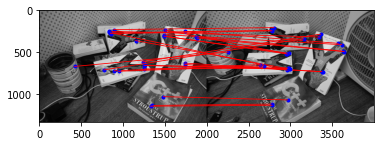

In [13]:
I1 = imread_gray('/content/drive/MyDrive/ColabNotebooks/assignment5/data/desk/DSC02639.JPG')
I2 = imread_gray('/content/drive/MyDrive/ColabNotebooks/assignment5/data/desk/DSC02641.JPG')
RT = find_matches(I1,I2)
R = RT[:,0:2]
T = RT[:,2:]

In [31]:
import random

def inliers(R,T,F,area):
  ins = []
  E = 0
  for i in range(len(R)):
    x = np.array([[R[i,0],R[i,1],1]])
    x_ = F.dot(x.T)
    x_ = (x_/x_[-1])[:2]
    y = np.array([T[i,0],T[i,1]])
    err = np.sum(np.power(x_ - y,2))
    E += err
    #print(err)
    if err <= area:
      ins.append(i)
  #errors = np.power(H*R-T,2) #..............
  #return(np.which(errors <= area))
  return(ins,E)

def ransac(R,T,n=1000,area=5000000,enough_inliers=None):
  if enough_inliers is None: enough_inliers = len(R)*0.7

  insl_F = None
  for k in range(n):
    s = random.sample(range(len(R)),8)
    F = fundamental_matrix_ext(R[s],T[s])
    #H = estimate_homography(R[s],T[s])
    if F is None: continue
    ins, E = inliers(R,T,F,area)

    if insl_F is None or insl_F[0] > E:
      insl_F = (E,F)
      print(E)

    if len(ins) >= enough_inliers:
      #print("*")
      F = fundamental_matrix_ext(R[ins],T[ins])
      if F is None: continue
      ins, E = inliers(R,T,F,area)
    #else:
      #print("**")
      if insl_F is None or insl_F[0] > E:
        insl_F = (E,F)
        print(E,"*")
  return insl_F[1]


84307944.18883196
84307925.1168439
84307433.85784425
84303665.90640073
[[ 5.51944873e-06 -5.31328661e-06 -3.00601893e-03]
 [-1.33957750e-05  8.09811324e-06  1.13719966e-02]
 [ 1.17429886e-03  7.51460498e-04 -2.23862953e+00]]


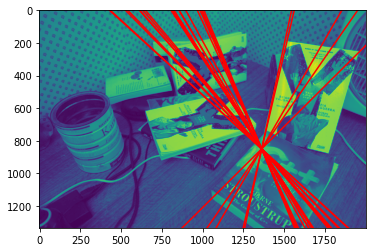

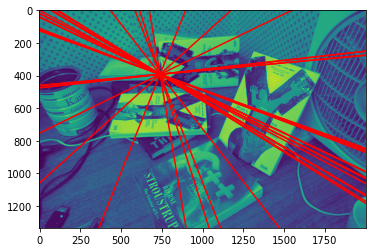

84307964.23042913
84307943.378251
84307907.17665692
84307872.12700172
84306887.35258117
84306689.33137055
84303332.70939513
[[-1.30650209e-07 -8.47439376e-07 -1.60416772e-04]
 [ 6.46189364e-07 -4.21459544e-07  1.20160082e-03]
 [ 6.21509693e-05 -9.15550727e-04  1.93000168e-01]]


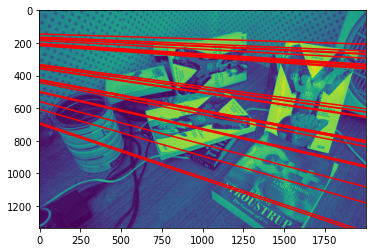

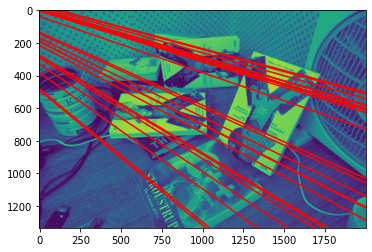

84308011.0858907
84307983.44889082
84307969.8656187
84307927.1905343
84307541.76643142
84303924.358899
84303625.89205876
84301930.20242651
84301038.15386765
[[ 1.85897433e-06 -5.43968011e-07  3.51768071e-04]
 [-1.06474546e-05  4.77415038e-06  8.94405942e-03]
 [ 3.23409101e-03 -1.69435085e-03 -4.33050738e+00]]


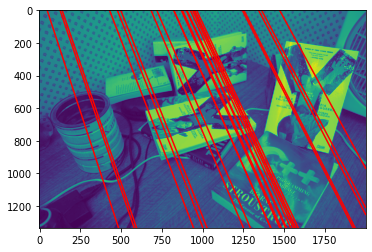

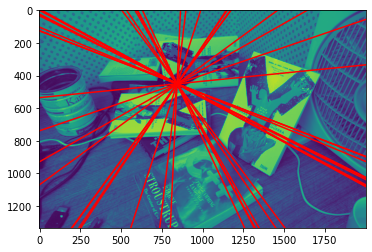

In [30]:
for i in range(3):
  F = ransac(R,T)
  print(F)
  epi(I1,I2,F,R,T)

EX 3a DELA

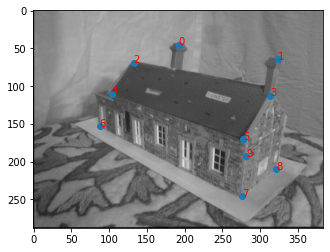

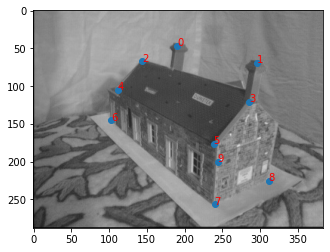

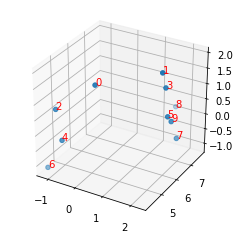

In [ ]:
def vp(x):
  mat = np.zeros((3,3))
  mat[0,1] = -x[2]
  mat[0,2] = x[1]
  mat[1,0] = x[2]
  mat[1,2] = -x[0]
  mat[2,0] = -x[1]
  mat[2,1] = x[0]
  return(mat)

def triangulation_one(x1,x2,P1,P2):
  A1 = vp(x1).dot(P1)
  A2 = vp(x2).dot(P2)
  A = np.row_stack([A1[:2,:],A2[:2,:]])

  _, _, VT = np.linalg.svd(A)
  x = VT[-1,:]
  x = x / VT[-1,-1]
  return(x)

def triangulation(UV,U_V_,P1,P2,T):
  R = None
  for i in range(UV.shape[0]):
    x1 = np.array([UV[i,0],UV[i,1],1])
    x2 = np.array([U_V_[i,0],U_V_[i,1],1])
    x = triangulation_one(x1,x2,P1,P2)
    if R is None:
      R = x[:3].reshape(1,3)
    else:
      R = np.row_stack([R,x[:3]])
  #R = (T.dot(R.T)).T
  return((R[:,0],R[:,1],R[:,2]))


P1 = np.loadtxt("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house1_camera.txt")
P2 = np.loadtxt("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house2_camera.txt")

INP = np.loadtxt("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house_points.txt")

I1 = plt.imread("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house1.jpg")
I2 = plt.imread("/content/drive/MyDrive/ColabNotebooks/assignment5/data/epipolar/house2.jpg")

plt.imshow(I1)
plt.scatter(INP[:,0],INP[:,1])
for i in range(len(INP[:,0])):
    plt.text(INP[:,0][i],INP[:,1][i], i, color='red')
plt.show()
plt.imshow(I2)
plt.scatter(INP[:,2],INP[:,3])
for i in range(len(INP[:,0])):
    plt.text(INP[:,2][i],INP[:,3][i], i, color='red')
plt.show()
T = np.array([-1,0,0,0,0,1,0,-1,0]).reshape((3,3))
X,Y,Z = triangulation(INP[:,:2],INP[:,2:],P1,P2,T)
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
#.scatter(2,3,4)


# T = np.row_stack([[-1,0,0],[0,0,1],[0,-1,0]])
# print(T)
# print(X)
X=-X
v = Y
Y = -Z
Z = v
ax.scatter(X,Y,Z)


for i in range(len(X)):
    ax.text(X[i],Y[i],Z[i], i, color='red')


EX 3b*